# Diabetes Project Write-up and Codes

## 1. Define the Problem

What features are most important for determining whether an individual has diabetes or not? Answering this question solves the problem of identifying the key characteristics of diabetes and, by doing this, helps with prevention for those who do not yet have diabetes but could get it in the future by detecting early signs, efficient diagnosis for those that have it, and overall healthcare efficiency because diagnosis is now efficient, cutting unnecessary tests and their costs.

## 2. Data Collection

The data was collected by the CDC via a telephone survey, which collects data on health-related conditions, behaviors, and preventative services. The original data set was taken from the American population, and responses from 441,455 American individuals were recorded. It was then cleaned and turned into diabetes.csv, which is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. So, there are 253,680 samples and 21 feature variables, most of which are binary classification variables (i.e., yes or no.) These are the individuals our data set focuses on. The data is of good quality, as it was collected by the CDC, which is a government agency, and we believe it is reliable because of this. 

However, it is important to note that this is a self-reported survey, and people may lie about how often they consume alcohol, cigarettes, fruits, vegetables, etc., which could lead to a failure in the ability to correctly identify the characteristics of those with diabetes. The class imbalance in this sample can create a misleading conclusion about the population, but we worked to counteract this by using models with equal sample sizes from each category.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 3. Data Preparation

### 3.1 Check if there's missing values

In [4]:
diabetes.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are 0 missing values in 22 features.

### 3.2 Check if there's duplicated rows

In [5]:
total_duplicates = diabetes.duplicated().sum()
total_duplicates

23899

We found 23899 duplicate rows in the `diabetes` dataset. However, we are not dropping them because each row represents a unique individual.

## 4. Data Exploration

### 4.1 Key Characteristics

`Diabetes_012` need to write more

In [6]:
diabetes.groupby(["Diabetes_012"]).mean(numeric_only = True)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,0.821439,...,0.949739,0.079610,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
1.0,0.629022,0.620816,0.986612,30.724466,0.492766,0.057223,0.143382,0.678471,0.602246,0.768948,...,0.945152,0.129346,2.975599,4.529907,6.348305,0.277478,0.437702,9.083351,4.784496,5.351112
2.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


### 4.2 Outliers or Anomalies

We define the function `detect_outliers` to check for outliers in the continuous feature variables `BMI`, `MentHlth`, and `PhysHlth` in the dataset diabetes. The remaining feature variables are binary or categorical, which typically do not exhibit outliers.

In [7]:
def detect_outliers(data, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()
    
    return outlier_indices

variables_to_check = ['BMI', 'MentHlth', 'PhysHlth']
outliers = detect_outliers(diabetes, variables_to_check)

for var, indices in outliers.items():
    print(f"{var}: {len(indices)} outliers detected")

BMI: 9847 outliers detected
MentHlth: 36208 outliers detected
PhysHlth: 40949 outliers detected


The large number of detected outliers suggests that we need to consider models which are robust to outliers, as these data points can significantly influence the results of our analysis.

### 4.3 Distribution of the Data

**Distribution of `Diabetes_012`:**

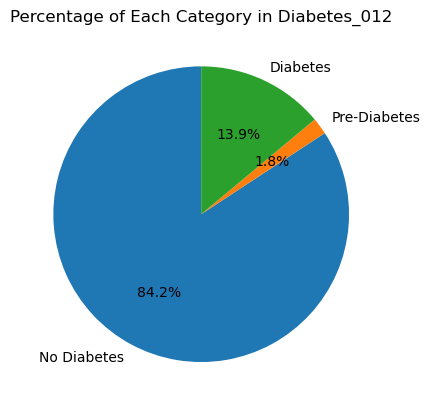

In [8]:
def calculate_percentage(value_counts):
    total = sum(value_counts)
    return [(count / total) * 100 for count in value_counts]

value_counts = diabetes['Diabetes_012'].value_counts()

value_counts = value_counts.sort_index()

labels = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']

percentages = calculate_percentage(value_counts)

plt.figure()
plt.pie(value_counts,
        labels=labels,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=90
       )
plt.title('Percentage of Each Category in Diabetes_012')
plt.show()

The unbalanced data, as shown in the distribution of the target variable `Diabetes_012`, indicates that the majority of the dataset belongs to the `No Diabetes` category, with significantly fewer instances for `Pre-Diabetes` and `Diabetes`. Models trained on such data may become biased toward the majority class, resulting in poor prediction accuracy for the minority classes.

In [9]:
diabetes = diabetes[diabetes['Diabetes_012'] != 1.0]

In [10]:
diabetes = diabetes.drop(diabetes[diabetes['Diabetes_012'] == 1.0].index)

In [11]:
def value_counts(df):
    
    value_counts_dict = {}
    
    for column in df:
        value_counts = df[column].value_counts()
        value_counts_dict[column] = value_counts
    
    return value_counts_dict

value_counts(diabetes)

{'Diabetes_012': Diabetes_012
 0.0    213703
 2.0     35346
 Name: count, dtype: int64,
 'HighBP': HighBP
 0.0    143133
 1.0    105916
 Name: count, dtype: int64,
 'HighChol': HighChol
 0.0    144333
 1.0    104716
 Name: count, dtype: int64,
 'CholCheck': CholCheck
 1.0    239641
 0.0      9408
 Name: count, dtype: int64,
 'BMI': BMI
 27.0    24180
 26.0    20277
 24.0    19318
 25.0    16911
 28.0    16253
         ...  
 85.0        1
 91.0        1
 86.0        1
 90.0        1
 78.0        1
 Name: count, Length: 83, dtype: int64,
 'Smoker': Smoker
 0.0    138908
 1.0    110141
 Name: count, dtype: int64,
 'Stroke': Stroke
 0.0    239022
 1.0     10027
 Name: count, dtype: int64,
 'HeartDiseaseorAttack': HeartDiseaseorAttack
 0.0    225820
 1.0     23229
 Name: count, dtype: int64,
 'PhysActivity': PhysActivity
 1.0    188778
 0.0     60271
 Name: count, dtype: int64,
 'Fruits': Fruits
 1.0    158109
 0.0     90940
 Name: count, dtype: int64,
 'Veggies': Veggies
 1.0    202280
 0

### 4.4 Correlation

In [12]:
corrs = diabetes.corr(method='spearman')
corrs

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.269319,0.205684,0.066037,0.231662,0.062212,0.107990,0.181258,-0.121028,-0.041736,...,0.016241,0.033152,0.293986,0.041591,0.160443,0.223991,0.031728,0.182223,-0.123319,-0.167714
HighBP,0.269319,1.000000,0.297901,0.098365,0.243041,0.097235,0.130302,0.210217,-0.125304,-0.040398,...,0.038501,0.017169,0.303019,0.019859,0.149419,0.223973,0.052835,0.345377,-0.141586,-0.179019
HighChol,0.205684,0.297901,1.000000,0.085530,0.135980,0.090680,0.092650,0.181250,-0.077966,-0.040581,...,0.043103,0.012251,0.207687,0.042766,0.118145,0.144283,0.031689,0.267316,-0.067915,-0.086626
CholCheck,0.066037,0.098365,0.085530,1.000000,0.039565,-0.010065,0.024618,0.044574,0.004584,0.023957,...,0.117995,-0.058594,0.045972,-0.013225,0.030224,0.040595,-0.022222,0.093022,0.004476,0.015825
BMI,0.231662,0.243041,0.135980,0.039565,1.000000,0.022740,0.022812,0.063998,-0.143600,-0.095755,...,-0.013053,0.051447,0.256329,0.052415,0.114877,0.178350,0.091202,-0.023874,-0.122429,-0.090911
Smoker,0.062212,0.097235,0.090680,-0.010065,0.022740,1.000000,0.060730,0.114122,-0.088291,-0.077226,...,-0.023480,0.048942,0.159323,0.060581,0.092655,0.122109,0.093134,0.120277,-0.174349,-0.133280
Stroke,0.107990,0.130302,0.092650,0.024618,0.022812,0.060730,1.000000,0.203750,-0.069937,-0.013476,...,0.008975,0.034246,0.163758,0.049662,0.127784,0.177875,0.003135,0.129638,-0.072946,-0.123839
HeartDiseaseorAttack,0.181258,0.210217,0.181250,0.044574,0.063998,0.114122,0.203750,1.000000,-0.087733,-0.019757,...,0.018863,0.030581,0.242492,0.033989,0.156352,0.213143,0.085973,0.228021,-0.096002,-0.141477
PhysActivity,-0.121028,-0.125304,-0.077966,0.004584,-0.143600,-0.088291,-0.069937,-0.087733,1.000000,0.142747,...,0.035168,-0.061434,-0.256551,-0.082038,-0.179160,-0.253542,0.032573,-0.088532,0.200914,0.202565
Fruits,-0.041736,-0.040398,-0.040581,0.023957,-0.095755,-0.077226,-0.013476,-0.019757,0.142747,1.000000,...,0.031136,-0.043610,-0.105857,-0.063424,-0.044782,-0.048020,-0.091887,0.066632,0.114886,0.076219


We then calculate the absolute correlations between all feature variables and the target variable `Diabetes_012` to identify the top 10 most strongly correlated features. We extract these features and create a heatmap to visualize the correlations between them, helping us to understand their relationships and their potential influence on diabetes outcomes.

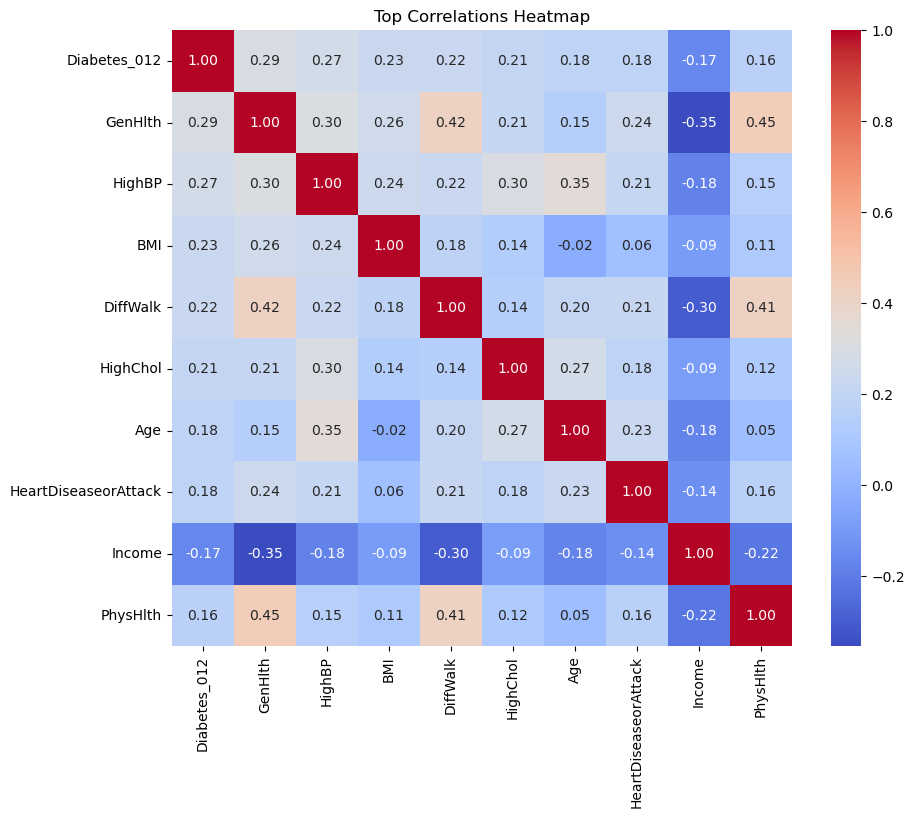

In [13]:
target_corr = corrs['Diabetes_012'].abs().sort_values(ascending=False)

top_features = target_corr.index[:10]

top_corrs = corrs.loc[top_features, top_features]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corrs, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top Correlations Heatmap")
plt.show()

### 4.5 Patterns or Trends

In [14]:
diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,...,249049.000000,249049.000000,249049.000000,249049.00000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000,249049.000000
mean,0.283848,0.425282,0.420463,0.962224,28.338813,0.442246,0.040261,0.093271,0.757995,0.634851,...,0.951162,0.083337,2.502761,3.15976,4.202916,0.166192,0.440391,8.012572,5.055379,6.066943
std,0.697945,0.494387,0.493634,0.190654,6.594030,0.496654,0.196571,0.290812,0.428298,0.481473,...,0.215529,0.276392,1.067308,7.38012,8.681035,0.372254,0.496435,3.058090,0.983375,2.066245
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.00000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.00000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 5. Model Building

### Model 1 Decision Tree

Why we are using decison tree? Explain

In [15]:
diabetes.value_counts("Diabetes_012")

Diabetes_012
0.0    213703
2.0     35346
Name: count, dtype: int64

In [16]:
with_diabetes = diabetes[diabetes["Diabetes_012"] == 2.0]
without_diabetes = diabetes[diabetes["Diabetes_012"] == 0.0]

Explian why we undersample?

In [17]:
without_diabetes_sample = without_diabetes.sample(35346)

In [18]:
new_reduced = pd.concat([with_diabetes, without_diabetes_sample] , axis= 0)
new_reduced.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0


In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def find_best_depth(test_scores):
    for i in np.arange(0,len(test_scores)):
        if test_scores[i] == max(test_scores):
            return(i+1)

Score on train: 0.7491777769919016
Score on test: 0.7377281086433725


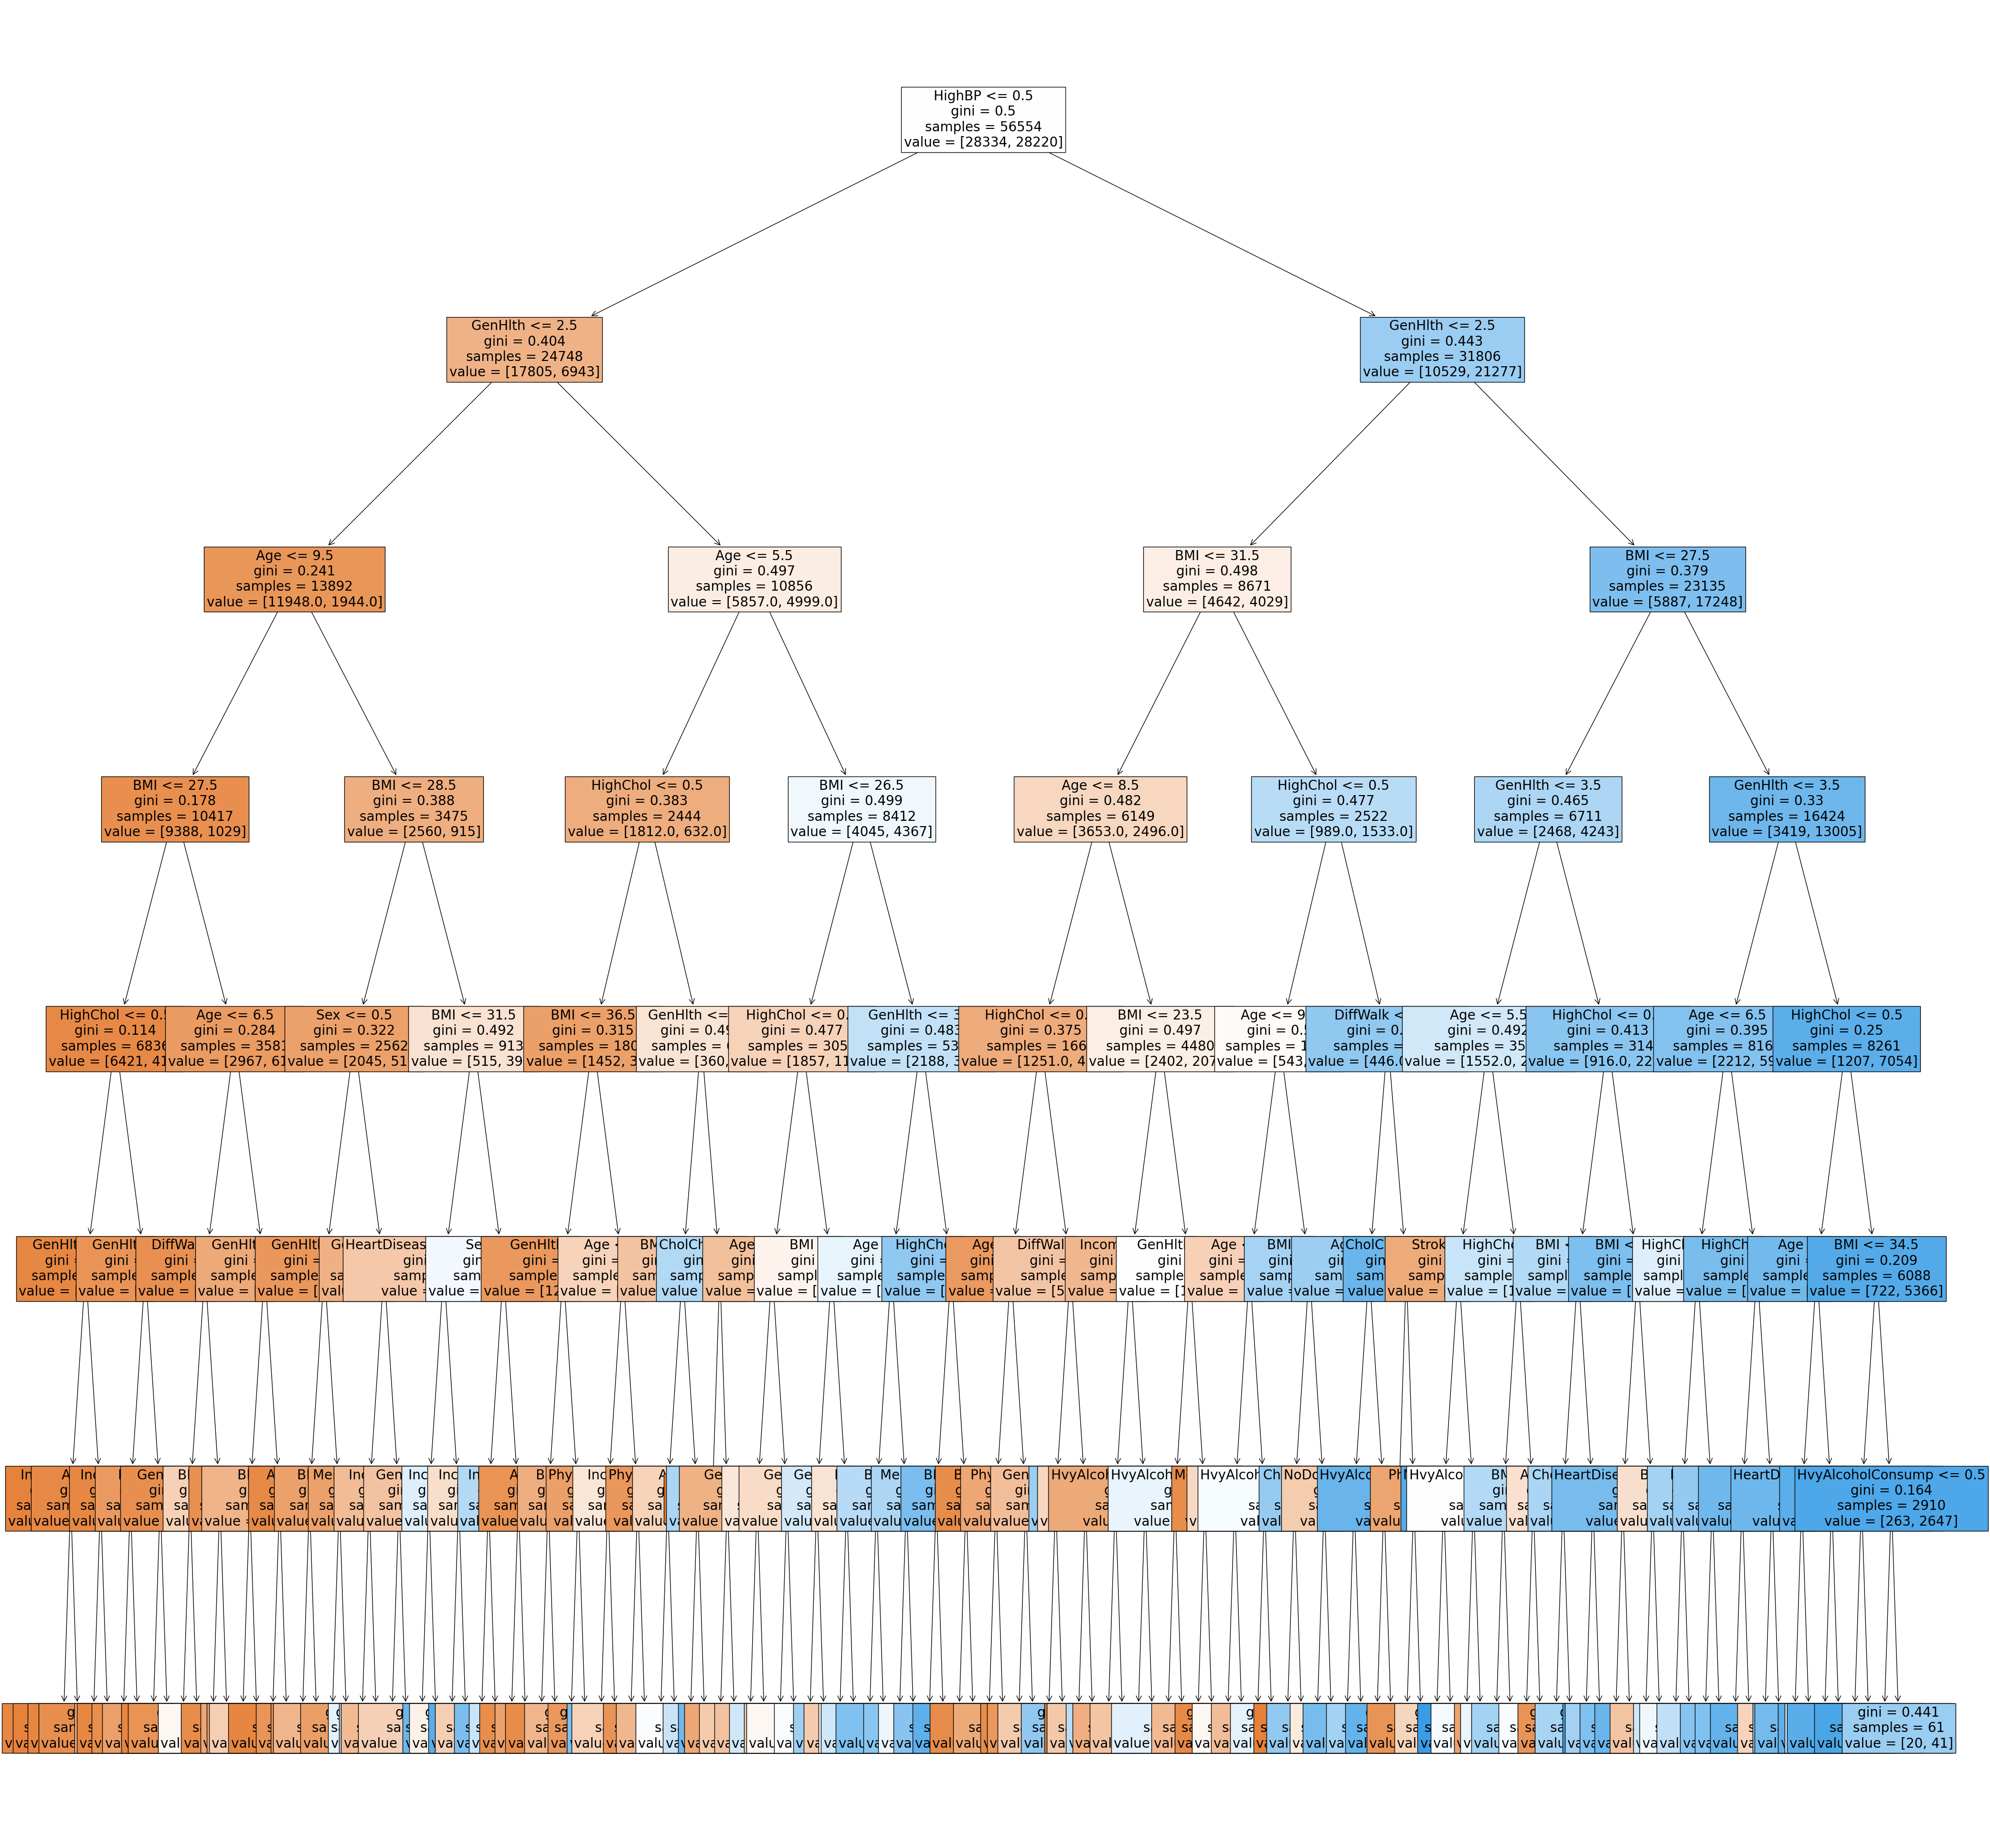

In [20]:
train_3 = new_reduced.sample(frac=0.8)
test_3 = new_reduced.drop(index=train_3.index)
X_train_3 = train_3.drop(columns=["Diabetes_012"])
y_train_3 = train_3["Diabetes_012"]
X_test_3 = test_3.drop(columns=["Diabetes_012"])
y_test_3 =  test_3["Diabetes_012"]
train_scores=[]
test_scores=[]
r=range(1,13)
for i in r:
    T = DecisionTreeClassifier(max_depth= i)
    T.fit(X_train_3, y_train_3)
    train_scores.append(T.score(X_train_3, y_train_3))
    test_scores.append(T.score(X_test_3, y_test_3))
T = DecisionTreeClassifier(max_depth= find_best_depth(test_scores))
T.fit(X_train_3, y_train_3)
train_score_3 = T.score(X_train_3, y_train_3)
test_score_3 = T.score(X_test_3, y_test_3)
print('Score on train:', train_score_3)
print('Score on test:', test_score_3)
    
fig, ax = plt.subplots(1, figsize = (50, 50))
p = plot_tree(T, filled = True, feature_names = X_train_3.columns, fontsize=20)

In [21]:
from sklearn.metrics import classification_report

y_pred = T.predict(X_test_3)

report = classification_report(y_test_3, y_pred, target_names=['No Diabetes', "Diabetes"])
print("Classification Report:", report)

Classification Report:               precision    recall  f1-score   support

 No Diabetes       0.79      0.65      0.71      7012
    Diabetes       0.70      0.83      0.76      7126

    accuracy                           0.74     14138
   macro avg       0.75      0.74      0.74     14138
weighted avg       0.75      0.74      0.74     14138



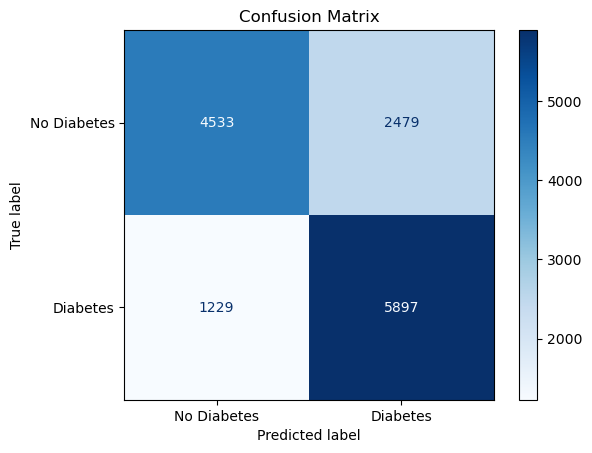

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test_3, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')  
plt.title('Confusion Matrix')
plt.show()

### Model 2

We will use Random Forest because it is a powerful and flexible model that can handle both binary and continuous variables, making it well-suited for our dataset, which includes predictors like `HighBP`, `Smoker`, and `BMI`. Random Forest is robust to outliers, minimizes the risk of overfitting through the ensemble of decision trees, and provides feature importance scores, allowing us to identify which health and lifestyle factors are most strongly associated with diabetes or pre-diabetes. Additionally, Random Forest does not require extensive data preprocessing, such as scaling or normalization, making it efficient to implement. By leveraging Random Forest, we aim to achieve strong predictive performance while gaining valuable insights into the relative importance of various predictors, setting a high benchmark for future comparisons with other models.

In [23]:
X = diabetes.drop(columns=['Diabetes_012'])  # Predictor Variables
y = diabetes['Diabetes_012']  # Target column

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (249049, 21)
Shape of y: (249049,)


Why we are using SMOTE/oversample?

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm_model = SMOTE(random_state=42)
X_resampled, y_resampled = sm_model.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0.0: 213703, 2.0: 213703})


In [25]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({0.0: 170982, 2.0: 170942})


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.89      0.96      0.92     42721
    Diabetes       0.95      0.88      0.91     42761

    accuracy                           0.92     85482
   macro avg       0.92      0.92      0.92     85482
weighted avg       0.92      0.92      0.92     85482



                 Feature  Importance
0                 HighBP    0.152380
13               GenHlth    0.134951
1               HighChol    0.108097
3                    BMI    0.106050
18                   Age    0.082158
20                Income    0.054894
19             Education    0.042921
16              DiffWalk    0.040204
7           PhysActivity    0.037251
17                   Sex    0.036730
15              PhysHlth    0.034799
4                 Smoker    0.031884
8                 Fruits    0.028144
6   HeartDiseaseorAttack    0.027502
14              MentHlth    0.025769
9                Veggies    0.019199
10     HvyAlcoholConsump    0.010385
12           NoDocbcCost    0.009858
5                 Stroke    0.009002
11         AnyHealthcare    0.005141
2              CholCheck    0.002682


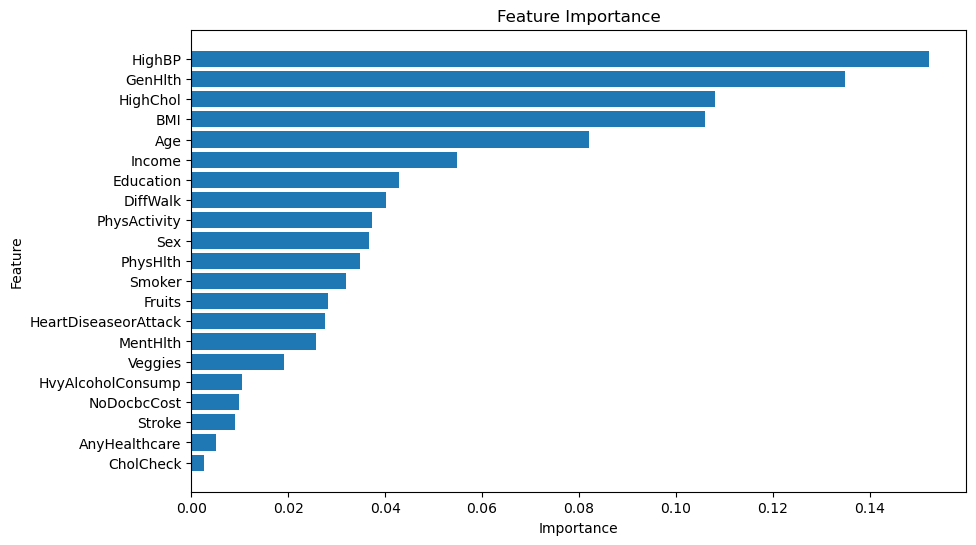

In [27]:
feature_names = X_train.columns  

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

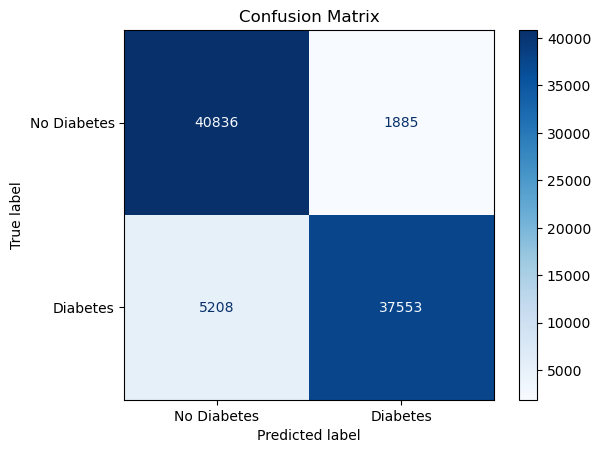

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')  
plt.title('Confusion Matrix')
plt.show()

## 6. Model Evaluation

## 7. Model Development

Use the model to help solve the problem
In what way will it help solve the problem?
How will it be integrated?
How will it be monitored and maintained over time?
What are the potential risks or challenges or ethical considerations associated with deploying it?
How will performance be measured and evaluated once in use?